# Google Local Data

- Tommaso Ghisini (togh22ab)
- Frederik Markus Rytoft Gøtske (frgo18ab)
- Marcel Wilhelm Frey (mafr22ao)
- Richard Dudzak (ridu22ab)

In [6]:
# Installing required libraries
! pip install -r "requirements (1).txt"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.7/353.7 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 36.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 33.8 MB/s eta 0:00:00:00:010:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 11.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.7/769.7 kB 16.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 367.7 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━

Importing required libraries and setting the working directory to the repository location

In [7]:
import os
import re
import nltk
import emoji
import spacy
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from tqdm.notebook import tqdm
from multiprocessing import Pool
from collections import defaultdict

from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
!python -m spacy download en_core_web_lg

In [8]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/ucloud/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ucloud/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
os.chdir('/work/GoogleLocalData2021')

## Data Exploration and Preprocessing

Reading the dataset, metadata and reviews

In [5]:
meta = pd.read_pickle('./data/meta.pkl')
reviews = pd.read_pickle('./data/restaurant-reviews.pkl')

In [6]:
print("Shape of meta:", meta.shape)
print("Shape of reviews:", reviews.shape)

Shape of meta: (75506, 15)
Shape of reviews: (13477237, 8)


In [7]:
meta.head(1)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
1,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.29213,korean restaurant,4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


In [8]:
reviews.head(1)

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.078898e+20,jane moon,1623536126668,5.0,One of the best Korean rice cake places in town,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49


Checking the columns of the two dataframes

In [9]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75506 entries, 1 to 515956
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              75506 non-null  object 
 1   address           75389 non-null  object 
 2   gmap_id           75506 non-null  object 
 3   description       40876 non-null  object 
 4   latitude          75506 non-null  float64
 5   longitude         75506 non-null  float64
 6   category          75506 non-null  object 
 7   avg_rating        75506 non-null  float64
 8   num_of_reviews    75506 non-null  int64  
 9   price             53445 non-null  object 
 10  hours             71957 non-null  object 
 11  MISC              75256 non-null  object 
 12  state             54213 non-null  object 
 13  relative_results  69300 non-null  object 
 14  url               75506 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 9.2+ MB


In [10]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13477237 entries, 0 to 13477236
Data columns (total 8 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  float64
 1   name     object 
 2   time     int64  
 3   rating   float64
 4   text     object 
 5   pics     object 
 6   resp     object 
 7   gmap_id  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 822.6+ MB


Dropping the duplicates both for reviews and metadata

In [11]:
num_duplicates_m = len(meta.loc[meta.duplicated(subset='gmap_id')])
num_duplicates_r = len(meta.loc[reviews.duplicated(subset=['name', 'text',
                                                           'gmap_id', 'rating'])])
print("Number of duplicates in metadata:", num_duplicates_m)
print("Number of duplicates in reviews:", num_duplicates_r)

meta.drop_duplicates(subset='gmap_id', inplace=True)
reviews.drop_duplicates(subset=['name', 'text', 'gmap_id', 'rating'], inplace=True)

Number of duplicates in metadata: 111
Number of duplicates in reviews: 5279


Dropping columns that are not relevant

In [12]:
reviews.drop(columns=['name', 'pics', 'resp'], inplace=True)
meta.drop(columns=['address', 'description', 'hours',
                   'MISC', 'state', 'relative_results', 'url'], inplace=True)

Joining the two datasets

In [13]:
df = pd.merge(reviews, meta, how='left', on='gmap_id')
df.to_pickle('./data/restaurants.pkl')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13186137 entries, 0 to 13186136
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         float64
 1   time            int64  
 2   rating          float64
 3   text            object 
 4   gmap_id         object 
 5   name            object 
 6   latitude        float64
 7   longitude       float64
 8   category        object 
 9   avg_rating      float64
 10  num_of_reviews  int64  
 11  price           object 
dtypes: float64(5), int64(2), object(5)
memory usage: 1.2+ GB


Checking for Nulls

In [15]:
df.isna().sum()

user_id               352
time                    0
rating                352
text                    0
gmap_id                 0
name                    0
latitude                0
longitude               0
category                0
avg_rating              0
num_of_reviews          0
price             1078294
dtype: int64

In [16]:
df.describe()

,user_id,time,rating,latitude,longitude,avg_rating,num_of_reviews
count,1.318578e+07,1.318614e+07,1.318578e+07,1.318614e+07,1.318614e+07,1.318614e+07,1.318614e+07
mean,1.092224e+20,1.544517e+12,4.170931e+00,3.533633e+01,-1.192297e+02,4.244331e+00,9.278013e+02
std,5.322026e+18,4.644864e+10,1.256619e+00,2.059840e+00,4.438151e+00,3.216966e-01,1.073813e+03
min,1.000000e+20,6.626016e+11,1.000000e+00,2.849185e+01,-1.242649e+02,1.000000e+00,1.000000e+00
25%,1.046268e+20,1.518982e+12,4.000000e+00,3.387394e+01,-1.214335e+02,4.100000e+00,3.080000e+02
50%,1.092180e+20,1.549617e+12,5.000000e+00,3.413733e+01,-1.183515e+02,4.300000e+00,6.080000e+02
75%,1.138332e+20,1.574966e+12,5.000000e+00,3.750421e+01,-1.177994e+02,4.500000e+00,1.129000e+03
max,1.184467e+20,1.631063e+12,5.000000e+00,4.196626e+01,1.800000e+02,5.000000e+00,9.998000e+03


### Rating and Average Rating

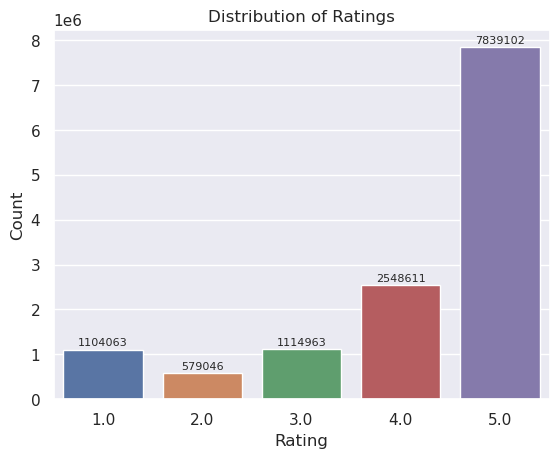

In [17]:
# Set the style of the plot
sns.set(style="darkgrid")

# Create the countplot
ax = sns.countplot(data=df, x='rating')

# Set labels and title
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title('Distribution of Ratings')

# Add count values to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

# Display the plot
plt.savefig('./data/plots/rating.png')
plt.show()


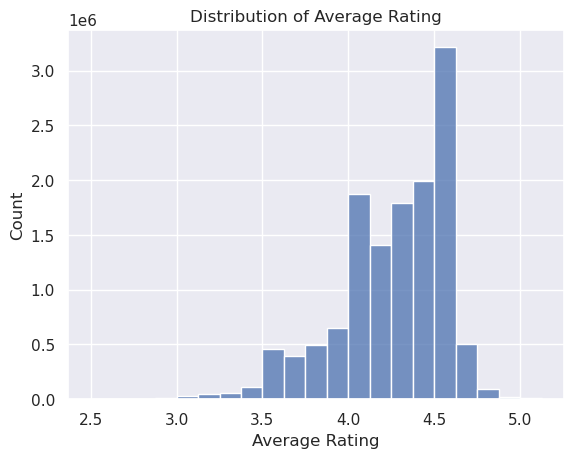

In [18]:
# Set the style of the plot
sns.set(style="darkgrid")

# Create the countplot
ax = sns.histplot(data=df, x='avg_rating', bins=np.arange(2.5,5.25, 0.125))

# Set labels and title
ax.set_xlabel('Average Rating')
ax.set_ylabel('Count')
ax.set_title('Distribution of Average Rating')

# Display the plot
plt.savefig('./data/plots/avg_rating.png')
plt.show()


### Text length and Word count

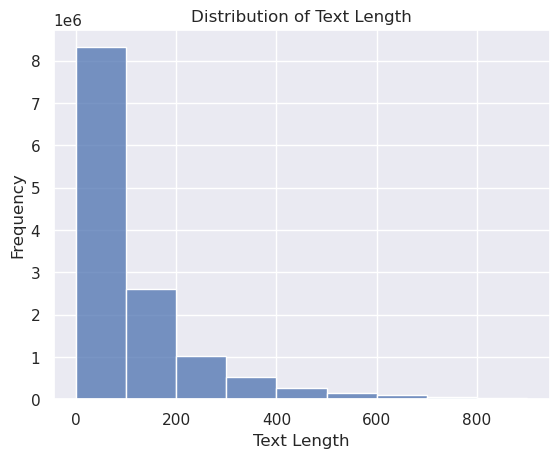

In [19]:
# Set the style of the plot
sns.set(style="darkgrid")

# Select the 'text' column and drop rows with missing values
text = df[['text']].dropna()

# Calculate the text length
text['text_length'] = text['text'].apply(len)

# Plot the distribution of text length
sns.histplot(text['text_length'], kde=False, bins=np.arange(0, 1000, 100))
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')

# Display the plot
plt.savefig('./data/plots/text_length.png')
plt.show()

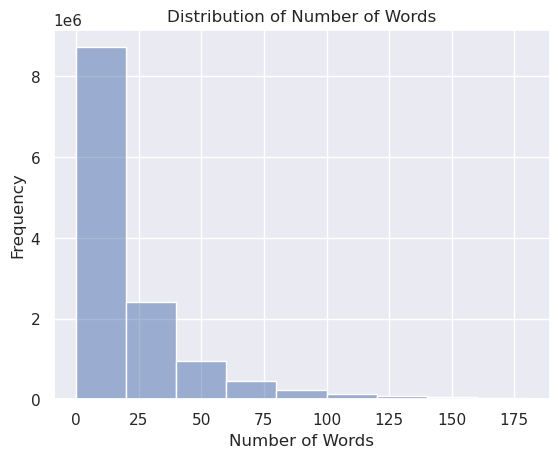

In [20]:
# Set the style of the plot
sns.set(style="darkgrid")

# Calculate the number of words
text['num_words'] = text['text'].str.split().apply(len)

# Plot the distribution of the number of words
sns.histplot(text['num_words'], kde=False, bins=np.arange(0, 200, 20), alpha=0.5)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Words')

# Display the plot
plt.savefig('./data/plots/number_of_words.png')
plt.show()


### Geospatial Analysis

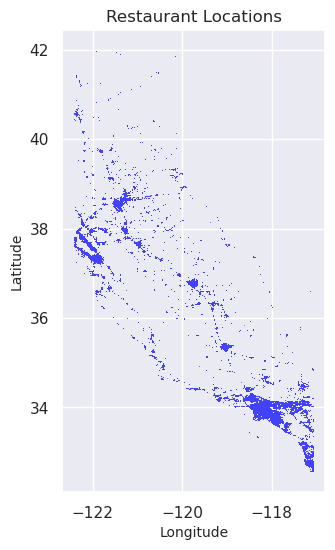

In [21]:
# Filter latitude outliers
latitude_min = df['latitude'].quantile(0.05)
latitude_max = df['latitude'].quantile(0.95)
df_position = df[(df['latitude'] >= latitude_min) & (df['latitude'] <= latitude_max)]

# Filter longitude outliers
longitude_min = df['longitude'].quantile(0.05)
longitude_max = df['longitude'].quantile(0.95)
df_position = df[(df['longitude'] >= longitude_min) & (df['longitude'] <= longitude_max)]

# Set the style of the plot
sns.set(style="darkgrid")

# Create the scatter plot
plt.figure(figsize=(7, 6))
ax = sns.scatterplot(data=df_position, x='longitude', y='latitude', s=0.3, color='blue', alpha=0.5)

# Set labels and title with smaller font size
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize=10)
ax.set_title('Restaurant Locations', fontsize=12)

# Set the aspect ratio to equal for a more accurate representation of locations
ax.set_aspect('equal', adjustable='box')

# Display the plot
plt.savefig('./data/plots/location.png')
plt.show()

### Time Analysis

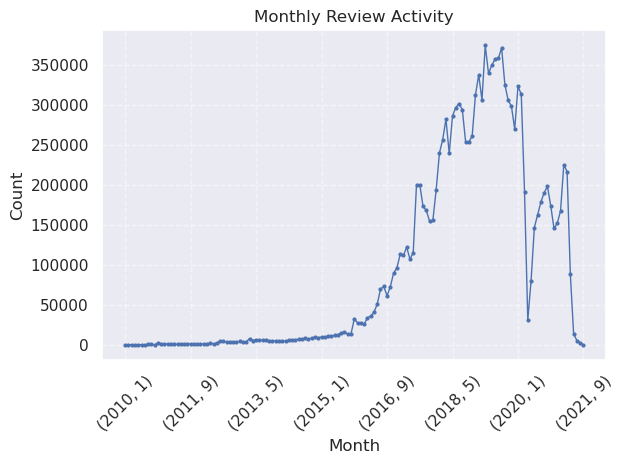

In [22]:
# Time Analysis
df['time'] = pd.to_datetime(df['time'], unit='ms')
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month

monthly_counts = df.groupby(['year', 'month']).size()
monthly_counts = monthly_counts.loc[2010:]  # Filter data for years after 2010

# Create the line plot
monthly_counts.plot(kind='line', marker='o', linestyle='-', linewidth=1, markersize=2)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Review Activity')

# Customize the appearance
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Drop columns not needed anymore
df.drop(columns=['month', 'year'], inplace=True)

# Display the plot
plt.tight_layout()  # Adjust the layout
plt.savefig('./data/plots/time.png')
plt.show()


### Categories

In [23]:
df.category.describe()

count               13186137
unique                   243
top       mexican restaurant
freq                 2062459
Name: category, dtype: object

In [24]:
df.value_counts('category').head(10)

category
mexican restaurant      2062459
fast food restaurant    1816598
restaurant              1409392
hamburger restaurant     884661
american restaurant      777201
pizza restaurant         759740
seafood restaurant       505151
italian restaurant       472205
chinese restaurant       443298
sushi restaurant         254015
Name: count, dtype: int64

In [25]:
df.value_counts('category').tail(10)

category
dominican restaurant               27
north eastern indian restaurant    26
tempura restaurant                 22
takoyaki restaurant                21
sfiha restaurant                   18
haute french restaurant            17
native american restaurant         11
haitian restaurant                 10
korean beef restaurant              3
indian sizzler restaurant           3
Name: count, dtype: int64

In [ ]:
restaurant_buckets = {
    "East Asian": ['korean restaurant', 'chinese restaurant', 'asian fusion restaurant', 'sushi restaurant', 
                   'filipino restaurant', 'vietnamese restaurant', 'asian restaurant', 'japanese restaurant', 
                   'mongolian barbecue restaurant', 'authentic japanese restaurant', 'taiwanese restaurant', 
                   'chinese noodle restaurant', 'shabu-shabu restaurant', 'cantonese restaurant', 
                   'conveyor belt sushi restaurant', 'japanese curry restaurant', 
                   'hong kong style fast food restaurant', 'indonesian restaurant', 'cambodian restaurant', 
                   'hot pot restaurant', 'hunan restaurant', 'shanghainese restaurant', 
                   'teppanyaki restaurant', 'tonkatsu restaurant', 'izakaya restaurant', 
                   'yakisoba restaurant', 'mandarin restaurant', 'yakiniku restaurant',
                   'malaysian restaurant', 'sukiyaki and shabu shabu restaurant',
                   'sundanese restaurant', 'soondae restaurant', 'kyoto style japanese restaurant', 
                   'yakitori restaurant', 'japanese regional restaurant', 'japanized western restaurant', 
                   'singaporean restaurant', 'takoyaki restaurant', 'kaiseki restaurant', 
                   'syokudo and teishoku restaurant', 'okonomiyaki restaurant', 'tempura restaurant',
                   'japanese sweets restaurant', 'udon noodle restaurant', 'gyudon restaurant', 
                   'miso cutlet restaurant', 'sichuan restaurant', 'shandong restaurant','thai restaurant', 
                   'pho restaurant', 'dim sum restaurant','korean barbecue restaurant', 'dumpling restaurant',
                   'delivery chinese restaurant','korean barbecue restaurant','burmese restaurant', 
                   'laotian restaurant','wok restaurant','southeast asian restaurant','korean beef restaurant'],
    "South Asian": ['indian restaurant', 'pakistani restaurant', 'modern indian restaurant', 
                    'indian sizzler restaurant', 'north eastern indian restaurant', 'indian muslim restaurant',
                    'punjabi restaurant', 'south indian restaurant', 'sri lankan restaurant', 'afghani restaurant',
                    'bangladeshi restaurant', 'nepalese restaurant','south asian restaurant'],
    "Middle Eastern": ['middle eastern restaurant', 'turkish restaurant', 'persian restaurant', 
                       'lebanese restaurant', 'israeli restaurant', 'yemenite restaurant', 
                       'armenian restaurant', 'syrian restaurant', 'egyptian restaurant',
                       'kosher restaurant', 'falafel restaurant', 'jewish restaurant','halal restaurant'],
    "Latin American": ['south american restaurant','mexican restaurant', 'taco restaurant', 'peruvian restaurant', 'cuban restaurant', 
                       'brazilian restaurant', 'argentinian restaurant', 'chilean restaurant', 
                       'venezuelan restaurant', 'ecuadorian restaurant', 'puerto rican restaurant','burrito restaurant',
                       'salvadoran restaurant', 'latin american restaurant','colombian restaurant', 
                       'guatemalan restaurant','oaxacan restaurant', 'pan-latin restaurant',
                       'central american restaurant', 'mexican torta restaurant','haitian restaurant', 'honduran restaurant',
                       'costa rican restaurant', 'nicaraguan restaurant',
                       'nuevo latino restaurant', 'dominican restaurant','jamaican restaurant', 'caribbean restaurant'],
    "European": ['italian restaurant', 'irish restaurant', 'french restaurant', 'german restaurant', 
                 'spanish restaurant', 'british restaurant', 'greek restaurant', 'russian restaurant', 'gyro restaurant',
                 'swiss restaurant', 'belgian restaurant', 'portuguese restaurant', 'scandinavian restaurant',
                 'hungarian restaurant', 'danish restaurant', 'swedish restaurant','tapas restaurant',
                 'mediterranean restaurant', 'european restaurant','english restaurant', 'modern european restaurant',
                 'french steakhouse restaurant', 'czech restaurant', 'modern french restaurant', 'continental restaurant',
                 'austrian restaurant', 'haute french restaurant', 'georgian restaurant', 'basque restaurant',
                 'meat dish restaurant', 'croatian restaurant', 'chophouse restaurant', 'tuscan restaurant',
                 'turkmen restaurant', 'provence restaurant','sicilian restaurant', 'eastern european restaurant',
                 'roman restaurant', 'romanian restaurant', 'neapolitan restaurant', 'ukrainian restaurant',
                 'polish restaurant', 'modern british restaurant', 'scottish restaurant', 
                 'alsace restaurant','northern italian restaurant', 'southern italian restaurant'],
    "African": ['african restaurant', 'moroccan restaurant', 'ethiopian restaurant', 
                'west african restaurant', 'south african restaurant','eritrean restaurant', 'east african restaurant',
                'north african restaurant', 'tunisian restaurant'],
    "American": ['american restaurant', 'hawaiian restaurant', 'new american restaurant', 
                 'southern restaurant (us)', 'tex-mex restaurant', 'cajun restaurant', 'lunch restaurant',
                 'traditional restaurant', 'traditional american restaurant', 'californian restaurant', 
                 'soul food restaurant', 'family restaurant','down home cooking restaurant', 
                 'southwestern restaurant (us)','native american restaurant','canadian restaurant'],
    "Chicken": ['chicken restaurant', 'chicken wings restaurant'], 
    "Seafood": ['seafood restaurant', 'fish & chips restaurant', 'seafood donburi restaurant', 
                'oyster bar restaurant','angler fish restaurant'],
    "Barbecue": ['barbecue restaurant'],
    "Vegetarian": ['vegan restaurant', 'vegetarian restaurant', 'raw food restaurant'],
    "Fast Food": ['fast food restaurant', 'hamburger restaurant', 'hot dog restaurant',
                  'takeout restaurant','delivery restaurant','cheesesteak restaurant', 
                  'hoagie restaurant', 'po’ boys restaurant','self service restaurant'],
    "Pizza": ['pizza restaurant'],
    "Ramen": ['ramen restaurant'],
    "Noodles": ['chinese noodle restaurant', 'udon noodle restaurant'],
    "Desserts": ['dessert restaurant','sundae restaurant'],
    "Health and Diet": ['health food restaurant', 'organic restaurant', 'gluten-free restaurant', 'macrobiotic restaurant'],
    "Breakfast": ['breakfast restaurant','brunch restaurant', 'pancake restaurant'],
    "Fine Dining": ['fine dining restaurant','modern izakaya restaurants', 'contemporary louisiana restaurant'],
    "Buffet": ['buffet restaurant']
}

In [27]:
# Define function for mapping categories

def get_category(restaurant):
    for category, values in restaurant_buckets.items():
        if restaurant in values:
            return category
    return 'Other'

# Map categories
df['category_bucket'] = df['category'].apply(get_category)


In [28]:
df['category_bucket'].value_counts()

category_bucket
Fast Food          2768686
Latin American     2371814
East Asian         1730529
Other              1452414
American           1303320
European            811994
Pizza               759740
Seafood             522899
Chicken             349956
Breakfast           227076
South Asian         222663
Barbecue            205963
Buffet              126905
Middle Eastern       86185
Vegetarian           74050
Ramen                66166
Health and Diet      41555
Fine Dining          33026
African              15886
Desserts             15310
Name: count, dtype: int64

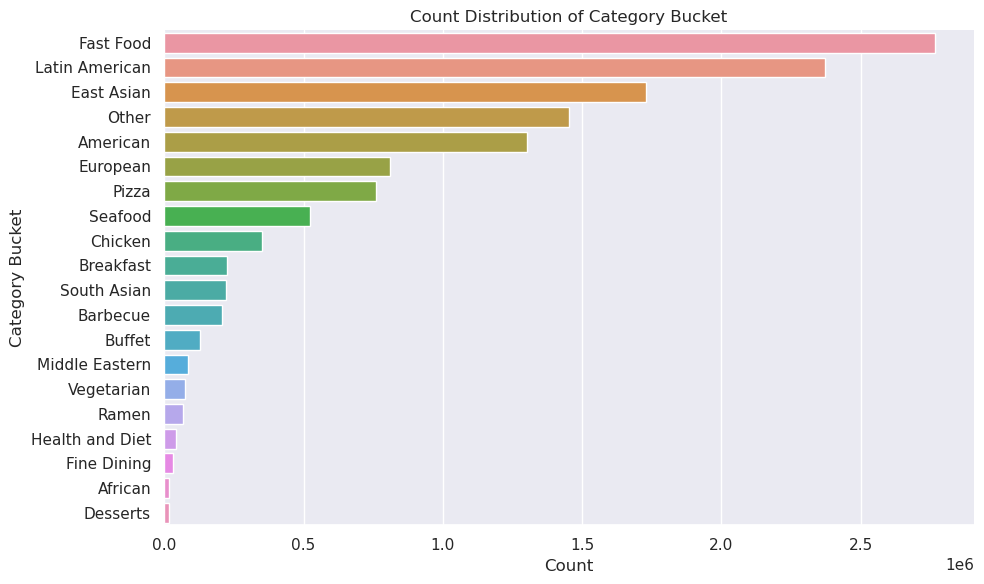

In [29]:
# Set the style of the plot
sns.set(style="darkgrid")

# Calculate count distribution
count_distribution = df['category_bucket'].value_counts().sort_values(ascending=False)

# Create the count distribution plot with inverted axes
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=count_distribution.index, x=count_distribution.values)

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Category Bucket')
plt.title('Count Distribution of Category Bucket')

# Customize the appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the plot
plt.tight_layout()
plt.savefig('./data/plots/category_bucket.png')
plt.show()


### Text Cleaning

In [30]:
df.columns

Index(['user_id', 'time', 'rating', 'text', 'gmap_id', 'name', 'latitude',
       'longitude', 'category', 'avg_rating', 'num_of_reviews', 'price',
       'category_bucket'],
      dtype='object')

In [31]:
def clean_translation(sentence):
    translation_marker = "(Translated by Google)"
    original_marker = "(Original)"
    
    # Remove "(Translated by Google)"
    sentence = sentence.replace(translation_marker, "").strip()
    
    # Check if "\(Original\)" exists in the sentence
    original_index = sentence.find(original_marker)
    if original_index != -1:
        # Keep the text before "\(Original\)"
        sentence = sentence[:original_index].strip()
    
    return sentence

def preprocess(pandasseries):
    
    # Fix Translations
    sentences = [clean_translation(sent).lower() for sent in pandasseries]
    
    # Spelling correction - EXTREMELY SLOW
    # sentences = [TextBlob(sent).correct() for sent in pandasseries]
    
    # Remove newline char
    sentences = [sent.replace('\n', '') for sent in sentences]

    # Replace non-alphanumeric characters with empty string
    # sentences = [re.sub(r"[^a-zA-Z0-9_ ]", "", sent) for sent in sentences]

    # Remove emojis
    sentences = [emoji.demojize(sent) for sent in sentences]
    sentences = [re.sub(r":[^:\s]+:", "", sent) for sent in sentences]
    sentences = [re.sub(r":[^:\s]+", "", sent) for sent in sentences]

    return sentences

In [32]:
# Define the chunk size
chunk_size = 5000

# Get the total number of rows in the DataFrame
total_rows = len(df)

# Initialize an empty list to store the processed chunks
processed_chunks = []

# Iterate over the DataFrame using a range-based loop with tqdm_notebook
for i in tqdm(range(0, total_rows, chunk_size), total=total_rows//chunk_size+1):
    # Get the start and end indices for the current chunk
    start = i
    end = min(i + chunk_size, total_rows)
    
    # Get the chunk of the DataFrame
    chunk = df[start:end]
    
    # Apply the preprocessing function to the 'text' column of the chunk
    processed_chunk = preprocess(chunk['text'])
    for c in processed_chunk:
        processed_chunks.append(c)

# Assign the processed column back to the original DataFrame
df.loc[:,'clean_text'] = processed_chunks
df.to_pickle('./data/data.pkl')

  0%|          | 0/2638 [00:00<?, ?it/s]

## Aspect Extraction using TF-IDF

### Data Load

In [ ]:
dat= pd.read_pickle('data/data/data_preprocessed_reduced.pkl')

### Bigram TF-IDF

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(ngram_range=(2, 2))

# Fit and transform with tqdm progress bar
tfidf_matrix = vectorizer.fit_transform(tqdm(dat["cleaned_text"], total=dat["cleaned_text"].shape[0]))

# Retrieve feature names from vocabulary
feature_names = vectorizer.get_feature_names_out()

# Convert TF-IDF sparse matrix to DataFrame
df = pd.DataFrame.sparse.from_spmatrix(tfidf_matrix, columns=feature_names)

# Sort the features by their TF-IDF scores in descending order
sorted_features = df.mean().sort_values(ascending=False)


# Print the top N features with their corresponding TF-IDF scores
top_n = 1000  # Specify the number of top features to display
results = []
for feature, score in (sorted_features.head(top_n).items()):
    new_row = {'Feature': feature, 'TF-IDF Score': f"{score:.4f}"}
    results.append(new_row)
    print(f"Feature: {feature}, TF-IDF Score: {score:.4f}")

results_df = pd.DataFrame(results)
print(results_df)


In [ ]:
results_df.to_pickle('results_TFIDF_bigram.pkl')

In [4]:
results_df

,Feature,TF-IDF Score
0,good food,0.0200
1,great food,0.0182
2,great service,0.0094
3,food good,0.0085
4,food great,0.0080
...,...,...
995,perfect place,0.0002
996,ve coming,0.0002
997,family atmosphere,0.0002
998,clean service,0.0002


In [ ]:
top_n = 1000  # Specify the number of top features to display
top_features = sorted_features.head(top_n)
for feature, score in top_features.items():
    print(f"Feature: {feature}, TF-IDF Score: {score:.4f}")

### Nouns TF-IDF

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform with tqdm progress bar
tfidf_matrix = vectorizer.fit_transform(tqdm(dat["cleaned_text"], total=dat["cleaned_text"].shape[0]))

# Retrieve feature names from vocabulary
feature_names = vectorizer.get_feature_names_out()

# Convert TF-IDF sparse matrix to DataFrame
df = pd.DataFrame.sparse.from_spmatrix((tfidf_matrix), columns=feature_names)

# Sort the features by their TF-IDF scores in descending order
sorted_features = df.mean().sort_values(ascending=False)

# Print the top N features with their corresponding TF-IDF scores
top_n = 1000  # Specify the number of top features to display
results = []
for feature, score in (sorted_features.head(top_n).items()):
    new_row = {'Feature': feature, 'TF-IDF Score': f"{score:.4f}"}
    results.append(new_row)
    print(f"Feature: {feature}, TF-IDF Score: {score:.4f}")

results_df = pd.DataFrame(results)
print(results_df)


In [ ]:
# Function to filter for nouns using POS tagging
def filter_nouns(text):
    tagged_tokens = nltk.pos_tag(nltk.word_tokenize(text))
    nouns = [word for word, pos in tagged_tokens if pos.startswith('N')]
    return ' '.join(nouns)

# Apply the noun filtering function to the 'Feature' column
filtered_corpus = results_df['Feature'].apply(filter_nouns)

# Create a new column in the 'results' DataFrame with the filtered text
#result['Filtered_Feature'] = filtered_corpus

# Print the updated 'results' DataFrame
#print(result)


In [ ]:
final = results_df.drop(results_df[filtered_corpus.eq('')].index)
final

In [ ]:
final.to_pickle('results_TFIDF_nouns.pkl')

In [ ]:
final.head(50)

### TF-IDF Bigram results

In [ ]:
dat = pd.read_pickle("C:/Users/r/Downloads/results_TFIDF_bigram.pkl")

In [ ]:
def assign_categories(df, aspects_categories):
    category_assignments = {}

    for _, row in df.iterrows():
        feature = row['Feature']
        categories = []

        words = feature.split()
        for word in words:
            for category, keywords in aspects_categories.items():
                if word in keywords:
                    categories.append(category)

        category_assignments[feature] = categories

    return category_assignments


aspects_categories = {
    'food_quality': ['food','taste', 'dish','seasoning','taste', 'flavor', 'ingredients', 'meal'],
    'dishes': ['burger', 'burgers', 'sushi', 'ceviche', 'crunchwrap', 'seafood', 'fish', 'rolls', 'pizza', 'tacos', 
               'salad', 'sauces', 'seasoning', 'chicken', 'bbq', 'steak', 'fries', 'onion rings', 'wings', 'pho', 
               'ramen', 'sausages', 'pasta', 'hamburgers', 'potato', 'noodles', 'dumplings', 'sushi rolls'],
    'service': ['staff', 'service', 'waitress', 'server', 'chef', 'person', 'workers', 'customer service', 
                'waiters', 'employees', 'crew', 'hostess', 'cashiers', 'waitstaff', 'cooks','team'],
    'price': ['price', 'prices', 'deal', 'value', 'dollars', 'cost', 'affordability', 'budget','expenses','charge','fee'],
    'atmosphere': ['venue', 'scene', 'place','setting', 'surroundings','place', 'atmosphere', 'vibe', 'music', 
                   'building', 'spot', 'community', 'seats', 'decor', 'ambience', 'environment', 'patio', 'bar', 
                   'lighting', 'layout', 'view', 'beach front', 'seating','lighting', 'art', 'plants','architecture',
                   'location', 'decor', 'music', 'ambience',  'seating arrangement', 'space', 'architecture'],
    'hygiene': ['clean','dirty','hygiene','cleanliness', 'bathroom', 'restrooms'],
    'menu_variety': ['menu', 'choices', 'items', 'sampler', 'specials', 'option', 'variety', 'selection', 'dishes', 
                     'options', 'meal', 'meals', 'topping options', 'menu items'],
    'portion_size': ['portions', 'portion size', 'amount', 'serving', 'servings', 'size'],
    'speed': ['wait', 'minutes', 'hour', 'time','preparation time', 'cooking time', 'serving time', 
              'waiting time', 'delivery time', 'reservation', 'turnaround', 'queue', 'line', 'rush', 'peak time'],
    'experience': ['results', 'experience', 'pleasure', 'opportunity', 'visit', 'feel', 'feeling', 'impression',
                   'visit', 'happy hour', 'event', 'date', 'night out', 'family meal', 'picnic', 'get-together'],
    'availability': ['pickup', 'curbside', 'orders', 'availability', 'open', 'opening', 'hours', 'location', 
                     'locations', 'delivery','open hours', 'closing hours', 'weekdays', 'weekends', 'holidays', 
                     'delivery', 'pickup', 'location', 'parking', 'accessibility', 'proximity']
}


category_assignments = assign_categories(dat, aspects_categories)

for feature, categories in category_assignments.items():
    print(f"Feature: {feature}")
    print(f"Categories: {categories}")
    print()


In [ ]:
def generate_word_pair_overview(category_assignments):
    category_overview = {}

    for feature, categories in category_assignments.items():
        words = feature.split()
        pairs = [(words[i], words[i+1]) for i in range(len(words)-1)]

        for category in categories:
            if category not in category_overview:
                category_overview[category] = []

            category_overview[category].extend(pairs)

    return category_overview

word_pair_overview = generate_word_pair_overview(category_assignments)

for category, word_pairs in word_pair_overview.items():
    print(f"Category: {category}")
    print(f"Word Pairs: {word_pairs}")
    print()


In [ ]:
results_bigrams =  {'food_quality': 0, 'dishes': 0, 'service': 0, 'price': 0, 'atmosphere': 0, 'hygiene': 0, 'menu_variety': 0, 'portion_size': 0, 'speed': 0, 'experience': 0, 'availability': 0}

for i in word_pair_overview.keys():
    
    for j, z in zip(dat["TF-IDF Score"], dat["Feature"]):  # Corrected variable name from 'zip(dat["Feature"])' to 'dat["Feature"]'
        x = ''.join(z)  # Removed redundant assignment 'x=' and fixed variable name
        for y in word_pair_overview[i]:
            if ' '.join(y) == x:
                results_bigrams[i] += float(j)  # Corrected dictionary name from 'results_nouns' to 'results_bigrams'
                
    




In [ ]:
# Create a new dictionary with values wrapped in lists
modified_results_bigrams = {key: [value] for key, value in results_bigrams.items()}

# Convert the modified dictionary to a DataFrame
df = pd.DataFrame.from_dict(modified_results_bigrams)
df

### TF-IDF Nouns results

In [ ]:
data = pd.read_pickle("C:/Users/r/Downloads/results_TFIDF_nouns.pkl")

In [ ]:

aspects_categories = {
    'food_quality': ['food','taste', 'dish','seasoning','taste', 'flavor', 'ingredients', 'meal'],
    'dishes': ['burger', 'burgers', 'sushi', 'ceviche', 'crunchwrap', 'seafood', 'fish', 'rolls', 'pizza', 'tacos', 
               'salad', 'sauces', 'seasoning', 'chicken', 'bbq', 'steak', 'fries', 'onion rings', 'wings', 'pho', 
               'ramen', 'sausages', 'pasta', 'hamburgers', 'potato', 'noodles', 'dumplings', 'sushi rolls'],
    'service': ['staff', 'service', 'waitress', 'server', 'chef', 'person', 'workers', 'customer service', 
                'waiters', 'employees', 'crew', 'hostess', 'cashiers', 'waitstaff', 'cooks','team'],
    'price': ['price', 'prices', 'deal', 'value', 'dollars', 'cost', 'affordability', 'budget','expenses','charge','fee'],
    'atmosphere': ['venue', 'scene', 'place','setting', 'surroundings','place', 'atmosphere', 'vibe', 'music', 
                   'building', 'spot', 'community', 'seats', 'decor', 'ambience', 'environment', 'patio', 'bar', 
                   'lighting', 'layout', 'view', 'beach front', 'seating','lighting', 'art', 'plants','architecture',
                   'location', 'decor', 'music', 'ambience',  'seating arrangement', 'space', 'architecture'],
    'hygiene': ['clean','dirty','hygiene','cleanliness', 'bathroom', 'restrooms'],
    'menu_variety': ['menu', 'choices', 'items', 'sampler', 'specials', 'option', 'variety', 'selection', 'dishes', 
                     'options', 'meal', 'meals', 'topping options', 'menu items'],
    'portion_size': ['portions', 'portion size', 'amount', 'serving', 'servings', 'size'],
    'speed': ['wait', 'minutes', 'hour', 'time','preparation time', 'cooking time', 'serving time', 
              'waiting time', 'delivery time', 'reservation', 'turnaround', 'queue', 'line', 'rush', 'peak time'],
    'experience': ['results', 'experience', 'pleasure', 'opportunity', 'visit', 'feel', 'feeling', 'impression',
                   'visit', 'happy hour', 'event', 'date', 'night out', 'family meal', 'picnic', 'get-together'],
    'availability': ['pickup', 'curbside', 'orders', 'availability', 'open', 'opening', 'hours', 'location', 
                     'locations', 'delivery','open hours', 'closing hours', 'weekdays', 'weekends', 'holidays', 
                     'delivery', 'pickup', 'location', 'parking', 'accessibility', 'proximity']
}
def categorize_aspects(value, aspects_categories):
    categories = []

    for aspect, keywords in aspects_categories.items():
        for keyword in keywords:
            pattern = r'\b{}\b'.format(re.escape(keyword))
            if re.search(pattern, value, flags=re.IGNORECASE):
                categories.append(aspect)
                break

    return categories


categories = data['Feature'].apply(categorize_aspects, aspects_categories=aspects_categories)

data['Categories'] = categories

In [ ]:
results_nouns = {'food_quality': 0, 'dishes': 0, 'service': 0, 'price': 0, 'atmosphere': 0, 'hygiene': 0, 'menu_variety': 0, 'portion_size': 0, 'speed': 0, 'experience': 0, 'availability': 0}

for i in aspects_categories.keys():
    for j, y in zip(data["TF-IDF Score"], data["Categories"]):
        z = ' '.join(y)
        if z == i:
            results_nouns[i] += float(j)  # Convert j to a numeric type (e.g., float)

print(results_nouns)


In [ ]:
# Create a new dictionary with values wrapped in lists
modified_results_nouns = {key: [value] for key, value in results_nouns.items()}

# Convert the modified dictionary to a DataFrame
df = pd.DataFrame.from_dict(modified_results_nouns)
df

## Aspect Extraction using spaCy

In [33]:
df = pd.read_pickle('./data/data.pkl')

In [34]:
nlp = spacy.load("en_core_web_lg")

In [35]:
def find_pairs(sentence):
    pairs = []
    doc = nlp(sentence)
    processed_nouns = []
    processed_adjectives = []
    
    # Generate compound nouns and their adjectives first
    for token in doc:
        if token.dep_ == 'compound':
            compound = token.text + " " + token.head.text
            processed_nouns.append(compound)
            processed_nouns.append(token.text)
            processed_nouns.append(token.head.text)
            
            # Look for adjectives related to the compound noun
            if token.i != 0:  # Make sure it's not the first token
                prev_token = token.nbor(-1)
                if prev_token.pos_ == 'ADJ':
                    sentiment = prev_token.text
                    polarity = TextBlob(sentiment).sentiment.polarity
                    pairs.append({'aspect': compound, 'sentiment': sentiment, 'polarity': polarity})
                    processed_adjectives.append(sentiment)
            continue
    
    # Handle regular nouns
        if token.pos_ == 'NOUN' and token.text not in processed_nouns:
            adj_siblings = [sibling for sibling in token.lefts if sibling.pos_ in ['ADJ']]
            if adj_siblings:
                adj = adj_siblings[-1]
                sentiment = adj.text

                # Check for adverbs modifying the adjective
                adv_modifiers = [child for child in adj.children if child.pos_ == 'ADV']
                if adv_modifiers:
                    sentiment = adv_modifiers[0].text + ' ' + sentiment

                polarity = TextBlob(sentiment).sentiment.polarity
                pairs.append({'aspect': token.text, 'sentiment': sentiment, 'polarity': polarity})


            # Check for adjective after noun
            for child in token.head.children:
                if child.dep_ == 'acomp':  # adjectival complement
                    sentiment = child.text
                    
                    polarity = TextBlob(sentiment).sentiment.polarity
                    pairs.append({'aspect': token.text, 'sentiment': sentiment, 'polarity': polarity})
                    processed_adjectives.append(sentiment)
            continue

    # Handle standalone adjectives
    for token in doc:
        try:
            if token.pos_ == 'ADJ' and token.nbor(-1).pos_ == 'PUNCT' and token.nbor(1).pos_ == 'PUNCT' and token.text not in processed_adjectives:
                sentiment = token.text
                polarity = TextBlob(sentiment).sentiment.polarity
                pairs.append({'aspect': 'sole_adjective', 'sentiment': sentiment, 'polarity': polarity})
        except IndexError:
            pass  # Ignore if there's no neighbor in the direction specified
    
    return pairs

In [36]:
def find_pairs_wrapper(text):
    return list(find_pairs(text))

n_processes = 14
length = len(df['clean_text'])

pool = Pool(n_processes)
pairs = list(tqdm(pool.imap(find_pairs_wrapper, df['clean_text']), total=length, mininterval=10))
pool.close()
pool.join()

df['pairs'] = pairs
df.to_pickle('./data/data_pairs.pkl')

  0%|          | 0/13186137 [00:00<?, ?it/s]

In [37]:
df.head()

,user_id,time,rating,text,gmap_id,name,latitude,longitude,category,avg_rating,num_of_reviews,price,category_bucket,clean_text,pairs
0,1.078898e+20,2021-06-12 22:15:26.668,5.0,One of the best Korean rice cake places in town,0x80c2c778e3b73d33:0xbdc58662a4a97d49,San Soo Dang,34.058092,-118.29213,korean restaurant,4.4,18,None,East Asian,one of the best korean rice cake places in town,"[{'aspect': 'rice cake', 'sentiment': 'korean'..."
1,1.089912e+20,2021-01-06 05:12:07.056,5.0,Love there korean rice cake.,0x80c2c778e3b73d33:0xbdc58662a4a97d49,San Soo Dang,34.058092,-118.29213,korean restaurant,4.4,18,None,East Asian,love there korean rice cake.,"[{'aspect': 'rice cake', 'sentiment': 'korean'..."
2,1.112903e+20,2021-02-09 05:47:28.663,5.0,Good very good,0x80c2c778e3b73d33:0xbdc58662a4a97d49,San Soo Dang,34.058092,-118.29213,korean restaurant,4.4,18,None,East Asian,good very good,[]
3,1.126404e+20,2020-03-08 05:04:42.296,4.0,They make Korean traditional food very properly.,0x80c2c778e3b73d33:0xbdc58662a4a97d49,San Soo Dang,34.058092,-118.29213,korean restaurant,4.4,18,None,East Asian,they make korean traditional food very properly.,"[{'aspect': 'food', 'sentiment': 'traditional'..."
4,1.174403e+20,2019-03-07 05:56:56.355,5.0,Short ribs are very delicious.,0x80c2c778e3b73d33:0xbdc58662a4a97d49,San Soo Dang,34.058092,-118.29213,korean restaurant,4.4,18,None,East Asian,short ribs are very delicious.,"[{'aspect': 'ribs', 'sentiment': 'short', 'pol..."


## Aspect Ranking with Naive Bayes

In [3]:
df = pd.read_pickle('./data/data_pairs.pkl')

In [7]:
# extract nouns from review texts
def extract_nouns(text):
    blob = TextBlob(text)
    nouns = [word for word, pos in blob.tags if pos.startswith('NN')]
    return ' '.join(nouns)

In [ ]:
from tqdm.auto import tqdm
tqdm.pandas()
df['nouns'] = df['clean_text'].progress_apply(extract_nouns)

In [ ]:
# transform aspect-sentiment pairs for fitting NB classifer
df['pairs_list'] = df['pairs'].apply(lambda x: [f"{d['aspect']} {d['sentiment']}" for d in x])

In [ ]:
df.head()

In [ ]:
# Filter rows based on non-English letters in pairs_list column
pattern = re.compile(r'[^\x00-\x7F]+')
df = df[~df['pairs_list'].astype(str).str.contains(pattern)]

In [ ]:
df.to_pickle('./data/nouns_pairs_rating.pkl')

In [5]:
df = pd.read_pickle('./data/nouns_pairs_rating.pkl')

### Naive Bayes

In [6]:
def fit_NB(column_name):
    
    # Prepare the training data
    reviews = df[column_name].tolist()
    # print(reviews)
    y = df['rating'].tolist() # more number of tokens than ratings -> see if it works, otherwise create new df with 1 pair + rating per record
    
    if column_name == 'pairs_list':
        
        # create custom tokens from aspect-sentiment pairs
        data_flat = sorted({item for sublist in reviews for item in sublist})
        
        custom_tokens = {token: idx for idx, token in enumerate(data_flat)}
      
        # calculate number of words of token with the most words 
        max_words = max(len(element.split()) for element in data_flat)
        
        # Concatenate sublist strings
        data_concatenated = [' '.join(sublist) for sublist in reviews]

        # Create a CountVectorizer with the custom tokens
        vectorizer = CountVectorizer(vocabulary=custom_tokens, ngram_range=(2,max_words))

        # Transform the data into a matrix of token counts
        X = vectorizer.fit_transform(data_concatenated)
        
    else:
        vectorizer = CountVectorizer()
        # Convert the reviews to a matrix of token counts (Bag-of-Words representation)
        X = vectorizer.fit_transform(reviews)

    # Train the Naive Bayes classifier
    classifier = MultinomialNB()
    classifier.fit(X, y)
    
    return classifier, vectorizer

In [7]:
# rank most important aspects associated with a specific star rating

def rank_aspects(n_rating_stars, classifier, vectorizer):

    # Get the index corresponding to the 5-star rating class
    star_index = list(classifier.classes_).index(n_rating_stars)

    # Retrieve the weights (log probabilities) for the 5-star rating class
    weights = classifier.feature_log_prob_[star_index]

    # Sort the weights in descending order and get the corresponding indices
    sorted_indices = weights.argsort()[::-1]

    # Get the feature names (words) corresponding to the sorted indices
    feature_names = {v: k for k, v in vectorizer.vocabulary_.items()}

    # Extract the most important words associated with a 5-star rating and their probabilities
    top_words = [(feature_names[i], weights[i]) for i in sorted_indices]  # Replace '50' with the desired number of words
    
    aspects_list = []
    # Append aspects and probabilities to the list
    for aspect, probability in top_words:
        if aspect != '':
            aspects_list.append({'Aspect': aspect, 'Probability': np.exp(probability)})

    # Create a DataFrame from the list of aspects and probabilities
    df = pd.DataFrame(aspects_list)

    return df

### Summarize Aspect Categories

In [16]:
aspects_categories = {
    'food_quality': ['food','taste', 'dish','seasoning','taste', 'flavor', 'ingredients', 'meal'],
    'dishes': ['burger', 'burgers', 'sushi', 'ceviche', 'crunchwrap', 'seafood', 'fish', 'rolls', 'pizza', 'tacos', 
               'salad', 'sauces', 'seasoning', 'chicken', 'bbq', 'steak', 'fries', 'onion rings', 'wings', 'pho', 
               'ramen', 'sausages', 'pasta', 'hamburgers', 'potato', 'noodles', 'dumplings', 'sushi rolls'],
    'service': ['staff', 'service', 'waitress', 'server', 'chef', 'person', 'workers', 'customer service', 
                'waiters', 'employees', 'crew', 'hostess', 'cashiers', 'waitstaff', 'cooks','team'],
    'price': ['price', 'prices', 'deal', 'value', 'dollars', 'cost', 'affordability', 'budget','expenses','charge','fee'],
    'atmosphere': ['venue', 'scene', 'place','setting', 'surroundings','place', 'atmosphere', 'vibe', 'music', 
                   'building', 'spot', 'community', 'seats', 'decor', 'ambience', 'environment', 'patio', 'bar', 
                   'lighting', 'layout', 'view', 'beach front', 'seating','lighting', 'art', 'plants','architecture',
                   'location', 'decor', 'music', 'ambience',  'seating arrangement', 'space', 'architecture'],
    'hygiene': ['clean','dirty','hygiene','cleanliness', 'bathroom', 'restrooms'],
    'menu_variety': ['menu', 'choices', 'items', 'sampler', 'specials', 'option', 'variety', 'selection', 'dishes', 
                     'options', 'meal', 'meals', 'topping options', 'menu items'],
    'portion_size': ['portions', 'portion size', 'amount', 'serving', 'servings', 'size'],
    'speed': ['wait', 'minutes', 'hour', 'time','preparation time', 'cooking time', 'serving time', 
              'waiting time', 'delivery time', 'reservation', 'turnaround', 'queue', 'line', 'rush', 'peak time'],
    'experience': ['results', 'experience', 'pleasure', 'opportunity', 'visit', 'feel', 'feeling', 'impression',
                   'visit', 'happy hour', 'event', 'date', 'night out', 'family meal', 'picnic', 'get-together'],
    'availability': ['pickup', 'curbside', 'orders', 'availability', 'open', 'opening', 'hours', 'location', 
                     'locations', 'delivery','open hours', 'closing hours', 'weekdays', 'weekends', 'holidays', 
                     'delivery', 'pickup', 'location', 'parking', 'accessibility', 'proximity']
}

In [17]:
def assign_aspect_category(aspect):
    for category, keywords in aspects_categories.items():
        if any(keyword in aspect for keyword in keywords):
            return category
    return 'other'

### Naive Bayes with noun aspects

In [26]:
classifier, vectorizer = fit_NB('nouns')

In [27]:
nouns_5star = rank_aspects(5, classifier, vectorizer)

In [33]:
nouns_5star['aspect_category'] = nouns_5star['Aspect'].apply(assign_aspect_category)

In [34]:
nouns_5star.head(10)

,Aspect,Probability,aspect_category
0,food,0.091276,food_quality
1,service,0.046074,service
2,place,0.039244,atmosphere
3,staff,0.015474,service
4,time,0.011648,speed
5,restaurant,0.010662,other
6,pizza,0.009673,dishes
7,chicken,0.008202,dishes
8,prices,0.006724,price
9,tacos,0.006179,dishes


In [35]:
categories_ranking = nouns_5star.groupby('aspect_category')['Probability'].sum().reset_index()
categories_ranking = categories_ranking.sort_values(by='Probability', ascending=False)

In [36]:
print(categories_ranking)

   aspect_category  Probability
7            other     0.590789
4     food_quality     0.111760
0       atmosphere     0.076866
10         service     0.073863
2           dishes     0.065226
11           speed     0.025704
9            price     0.018908
6     menu_variety     0.016690
3       experience     0.008633
8     portion_size     0.006067
1     availability     0.003706
5          hygiene     0.001787


In [29]:
nouns_1star = rank_aspects(1, classifier, vectorizer)

In [37]:
nouns_1star['aspect_category'] = nouns_1star['Aspect'].apply(assign_aspect_category)

In [38]:
nouns_1star.head(10)

,Aspect,Probability,aspect_category
0,food,0.050012,food_quality
1,service,0.029157,service
2,order,0.027331,other
3,place,0.020056,atmosphere
4,time,0.017576,speed
5,minutes,0.011197,speed
6,customer,0.009628,other
7,restaurant,0.008699,other
8,people,0.008259,other
9,chicken,0.007841,dishes


In [39]:
categories_ranking = nouns_1star.groupby('aspect_category')['Probability'].sum().reset_index()
categories_ranking = categories_ranking.sort_values(by='Probability', ascending=False)

In [40]:
print(categories_ranking)

   aspect_category  Probability
7            other     0.699960
4     food_quality     0.065821
10         service     0.054868
11           speed     0.052473
2           dishes     0.045619
0       atmosphere     0.041185
9            price     0.011363
3       experience     0.008291
6     menu_variety     0.007071
1     availability     0.006559
5          hygiene     0.003855
8     portion_size     0.002934


### Naive Bayes with aspect-sentiment pairs

In [13]:
classifier, vectorizer = fit_NB('pairs_list')

In [14]:
aspects_5star = rank_aspects(5, classifier, vectorizer)

In [15]:
aspects_1star = rank_aspects(1, classifier, vectorizer)

### Most important aspect categories, given 5-star rating

In [18]:
aspects_5star['aspect_category'] = aspects_5star['Aspect'].apply(assign_aspect_category)

In [19]:
aspects_5star.head(10)

,Aspect,Probability,aspect_category
0,food great,0.037646,food_quality
1,food good,0.025338,food_quality
2,service great,0.023865,service
3,place great,0.010205,atmosphere
4,service good,0.010091,service
5,staff friendly,0.009930,service
6,food delicious,0.009053,food_quality
7,food excellent,0.007496,food_quality
8,food amazing,0.007447,food_quality
9,service excellent,0.007320,service


In [20]:
categories_ranking = aspects_5star.groupby('aspect_category')['Probability'].sum().reset_index()
categories_ranking = categories_ranking.sort_values(by='Probability', ascending=False)

In [21]:
# Most important aspect categories, given 5-star rating
print(categories_ranking)

   aspect_category  Probability
7            other     0.357104
4     food_quality     0.189291
10         service     0.138918
0       atmosphere     0.110788
2           dishes     0.084195
9            price     0.031852
11           speed     0.028548
6     menu_variety     0.025022
3       experience     0.013057
8     portion_size     0.011957
5          hygiene     0.005240
1     availability     0.004028


### Most important aspect categories, given 1-star rating

In [22]:
aspects_1star['aspect_category'] = aspects_1star['Aspect'].apply(assign_aspect_category)

In [23]:
aspects_1star.head(10)

,Aspect,Probability,aspect_category
0,service bad,0.008211,service
1,food good,0.006480,food_quality
2,service horrible,0.006367,service
3,service terrible,0.004937,service
4,time first,0.004902,speed
5,food cold,0.003889,food_quality
6,service poor,0.003829,service
7,service worst,0.003677,service
8,time last,0.003052,speed
9,service slow,0.002915,service


In [24]:
categories_ranking = aspects_1star.groupby('aspect_category')['Probability'].sum().reset_index()
categories_ranking = categories_ranking.sort_values(by='Probability', ascending=False)

In [25]:
# Most important aspect categories, given 1-star rating
print(categories_ranking)

   aspect_category  Probability
7            other     0.548416
10         service     0.102267
4     food_quality     0.097738
2           dishes     0.069540
0       atmosphere     0.062152
11           speed     0.045553
3       experience     0.020002
9            price     0.016919
6     menu_variety     0.013996
5          hygiene     0.009553
8     portion_size     0.007488
1     availability     0.006376


## Insights and Report Generator
First, read the pickle file generated by the find_pairs function

In [9]:
df = pd.read_pickle('data_pairs.pkl')

In [10]:
%%time
absa = [
    {**d, 'category_bucket': df['category_bucket'].iloc[i]}
    for i, l in enumerate(df['pairs'])
    for d in l
    if len(l) != 0 and d['polarity'] != 0
]

CPU times: user 2min 30s, sys: 6.16 s, total: 2min 36s
Wall time: 2min 36s


In [11]:
absa = pd.DataFrame.from_records(absa)

In [12]:
absa.head(3)

,aspect,sentiment,polarity,category_bucket
0,ribs,delicious,1.000000,East Asian
1,food,great,0.800000,East Asian
2,food,large,0.214286,East Asian


In [13]:
# For running functions on the full dataset, run the below
test = absa

In [ ]:
# For running functions on a sample dataset, run the below
test = absa.sample(50000)

### Define Aspect Categories

In [14]:
aspects_categories = {
    'food_quality': ['food','taste', 'dish','seasoning','taste', 'flavor', 'ingredients', 'meal'],
    'dishes': ['burger', 'burgers', 'sushi', 'ceviche', 'crunchwrap', 'seafood', 'fish', 'rolls', 'pizza', 'tacos', 
               'salad', 'sauces', 'seasoning', 'chicken', 'bbq', 'steak', 'fries', 'onion rings', 'wings', 'pho', 
               'ramen', 'sausages', 'pasta', 'hamburgers', 'potato', 'noodles', 'dumplings', 'sushi rolls'],
    'service': ['staff', 'service', 'waitress', 'server', 'chef', 'person', 'workers', 'customer service', 
                'waiters', 'employees', 'crew', 'hostess', 'cashiers', 'waitstaff', 'cooks','team'],
    'price': ['price', 'prices', 'deal', 'value', 'dollars', 'cost', 'affordability', 'budget','expenses','charge','fee'],
    'atmosphere': ['venue', 'scene', 'place','setting', 'surroundings','place', 'atmosphere', 'vibe', 'music', 
                   'building', 'spot', 'community', 'seats', 'decor', 'ambience', 'environment', 'patio', 'bar', 
                   'lighting', 'layout', 'view', 'beach front', 'seating','lighting', 'art', 'plants','architecture',
                   'location', 'decor', 'music', 'ambience',  'seating arrangement', 'space', 'architecture'],
    'hygiene': ['clean','dirty','hygiene','cleanliness', 'bathroom', 'restrooms'],
    'menu_variety': ['menu', 'choices', 'items', 'sampler', 'specials', 'option', 'variety', 'selection', 'dishes', 
                     'options', 'meal', 'meals', 'topping options', 'menu items'],
    'portion_size': ['portions', 'portion size', 'amount', 'serving', 'servings', 'size'],
    'speed': ['wait', 'minutes', 'hour', 'time','preparation time', 'cooking time', 'serving time', 
              'waiting time', 'delivery time', 'reservation', 'turnaround', 'queue', 'line', 'rush', 'peak time'],
    'experience': ['results', 'experience', 'pleasure', 'opportunity', 'visit', 'feel', 'feeling', 'impression',
                   'visit', 'happy hour', 'event', 'date', 'night out', 'family meal', 'picnic', 'get-together'],
    'availability': ['pickup', 'curbside', 'orders', 'availability', 'open', 'opening', 'hours', 'location', 
                     'locations', 'delivery','open hours', 'closing hours', 'weekdays', 'weekends', 'holidays', 
                     'delivery', 'pickup', 'location', 'parking', 'accessibility', 'proximity']
}

# Filter out these words from aspects 
less_informative_words = ['other','ok','okay','very','good', 'great',
                          'fine', 'best', 'right', 'nice']

# Alternative categories
different_categories = {
    'taste_sensation': ['taste', 'flavor', 'spices', 'seasoning', 'salty', 'sweet', 'bitter', 'umami', 'spicy', 'savory', 'sour'],
    'culinary_adventure': ['menu', 'variety', 'dishes', 'unique', 'rare', 'specialty', 'exotic', 'new', 'creative', 'innovative', 'unusual', 'cuisine', 'culinary'],
    'emotional_response': ['pleasure', 'satisfaction', 'joy', 'surprise', 'disappointment', 'delight', 'contentment', 'comfort'],
    'visual_appeal': ['presentation', 'decor', 'layout', 'design', 'style', 'aesthetic', 'view', 'look', 'appealing', 'attractive'],
    'sociability': ['community', 'family', 'friends', 'date', 'meeting', 'party', 'gathering', 'celebration', 'event', 'social', 'networking'],
    'ambiance_narrative': ['atmosphere', 'theme', 'history', 'story', 'heritage', 'tradition', 'vibe', 'mood', 'narrative', 'culture', 'folklore'],
    'sustainability_initiatives': ['sustainable', 'green', 'eco-friendly', 'organic', 'recycling', 'composting', 'energy efficient', 'locally sourced', 'vegan', 'vegetarian', 'biodegradable'],
    'innovative_service': ['online ordering', 'mobile app', 'self-service', 'delivery', 'pickup', 'AI waiter', 'robot chef', 'virtual reality', 'augmented reality', 'technology'],
    'health_orientation': ['healthy', 'low fat', 'calorie count', 'nutritional value', 'diet', 'organic', 'vegan', 'vegetarian', 'gluten free', 'allergy friendly', 'keto', 'paleo'],
    'interactive_experiences': ['cooking classes', 'tasting events', 'wine pairing', 'mixology', 'interactive dining', 'live cooking', 'food challenges', 'chefs table']
}


### Generating Insights

In [15]:
def generate_insights(row, aspects_categories): 
    insights = {
        'like': defaultdict(lambda: {'count': 0, 'total_polarity': 0.0, 'aspects': defaultdict(lambda: {'count': 0, 'total_polarity': 0.0, 'sentiments': []})}),
        'dislike': defaultdict(lambda: {'count': 0, 'total_polarity': 0.0, 'aspects': defaultdict(lambda: {'count': 0, 'total_polarity': 0.0, 'sentiments': []})})
    }
    
    for category, aspects in aspects_categories.items():
        if row['aspect'] in aspects:
            like_dislike = 'like' if row['polarity'] > 0 else 'dislike'
            insights[like_dislike][category]['count'] += 1
            insights[like_dislike][category]['total_polarity'] += row['polarity']
            insights[like_dislike][category]['aspects'][row['aspect']]['count'] += 1
            insights[like_dislike][category]['aspects'][row['aspect']]['total_polarity'] += row['polarity']
            insights[like_dislike][category]['aspects'][row['aspect']]['sentiments'].append(row['sentiment'])
            
            
            # Compute average polarity
            if insights[like_dislike][category]['count'] > 0:
                insights[like_dislike][category]['avg_polarity'] = insights[like_dislike][category]['total_polarity'] / insights[like_dislike][category]['count']


    return insights


### Aggregating Insights

In [16]:
def aggregate_insights(insights_df, top_n=5):
    aggregated_insights = {
        'like': defaultdict(lambda: {'count': 0, 'total_polarity': 0.0, 'avg_polarity': None, 'aspects': defaultdict(lambda: {'count': 0, 'total_polarity': 0.0, 'sentiments': []})}),
        'dislike': defaultdict(lambda: {'count': 0, 'total_polarity': 0.0, 'avg_polarity': None, 'aspects': defaultdict(lambda: {'count': 0, 'total_polarity': 0.0, 'sentiments': []})})
    }

    for idx, row in insights_df.iterrows():
        insights = row['insights']
        for like_dislike in ['like', 'dislike']:
            for category, rows in insights[like_dislike].items():
                aggregated_insights[like_dislike][category]['count'] += rows['count']
                aggregated_insights[like_dislike][category]['total_polarity'] += rows['total_polarity']
                aggregated_insights[like_dislike][category]['avg_polarity'] = aggregated_insights[like_dislike][category]['total_polarity'] / aggregated_insights[like_dislike][category]['count'] if aggregated_insights[like_dislike][category]['count'] != 0 else None
                for aspect, aspect_data in rows['aspects'].items():
                    aggregated_insights[like_dislike][category]['aspects'][aspect]['count'] += aspect_data['count']
                    aggregated_insights[like_dislike][category]['aspects'][aspect]['total_polarity'] += aspect_data['total_polarity']
                    aggregated_insights[like_dislike][category]['aspects'][aspect]['sentiments'].extend(aspect_data['sentiments'])
                    

    return aggregated_insights



### Generating Final Insights
5mil rows: 10-20 mins for load, application of functions and generation of report

In [17]:
def generate_report(df, aspects_categories = aspects_categories, less_informative_words = less_informative_words, 
                    number_aspects = 3, number_sentiments = 3):
    
    # Apply the generate_insights function on each row of the DataFrame, store in new column "insights".
    df["insights"] = df.apply(lambda row: generate_insights(row, aspects_categories), axis=1)

    # Organize generated insights for presentation into a dict
    insights = aggregate_insights(df)

    # Iterate over 'like' and 'dislike' (positive and negative sentiment analysis) parts of the insights dict
    for like_dislike in ['like', 'dislike']:
        if like_dislike == 'like':
            insights[like_dislike] = sorted(insights[like_dislike].items(), key=lambda x: x[1]['avg_polarity'], reverse=True)
            print(f"\nCustomers commonly expressed positive sentiments towards these aspects of the restaurants:\n")
        else:
            insights[like_dislike] = sorted(insights[like_dislike].items(), key=lambda x: x[1]['avg_polarity'])
            print(f"\nOn the other hand, customers seemed less content with these aspects:\n")

        # Iterate over categories and corresponding rows in the sorted insights
        for category, rows in insights[like_dislike]:
            # Print the category name, number of reviews mentioning it, and the average sentiment
            print('\n',f"{category.upper()} was mentioned in {rows['count']} reviews with an average sentiment of {rows['avg_polarity']:.2f}.")
            # Sort the aspects in each category by total polarity, get the top 'number_aspects' aspects
            top_aspects = sorted(rows['aspects'].items(), key=lambda x: x[1]['total_polarity'], reverse=True)[:number_aspects]

            # Iterate over aspects and corresponding data in the top X aspects
            for aspect, aspect_data in top_aspects:
                # Create a list of sentiments for the aspect, filtering out less informative words
                sentiments = []
                for s in aspect_data['sentiments']:
                    if not any(less_info_word in s.lower() for less_info_word in less_informative_words):
                        sentiments.append(s)

                # If there are no sentiments remaining after filtering, print this fact and continue to the next aspect
                if not sentiments:  
                    print(f"  - '{aspect.upper()}' has no informative sentiments after filtering.")
                    continue
                
                # Perform TF-IDF vectorization on the sentiments
                vectorizer = TfidfVectorizer()
                tfidf_matrix = vectorizer.fit_transform(sentiments)

                # Perform Latent Dirichlet Allocation (LDA) on the TF-IDF matrix to identify topics in the sentiments
                lda = LatentDirichletAllocation(n_components=1, random_state=42)  
                lda.fit(tfidf_matrix)

                # Iterate over topics (there should be only one due to n_components=1 in the LDA)
                for i, topic in enumerate(lda.components_):
                    # Get the indices of the top X features (words) in the topic
                    top_features_ind = topic.argsort()[:-number_sentiments - 1:-1]  
                    # Get the corresponding feature names
                    top_features = [vectorizer.get_feature_names_out()[i] for i in top_features_ind]
                    # Convert the list of top features to a string
                    top_features_str = ', '.join(top_features).upper()
                    print(f"  - '{aspect.upper()}' was frequently mentioned, often associated with sentiments \n \t '{top_features_str}'.")


Parameters for generate_report can be changed, such as number of aspects/sentiments, aspect categories and non-informative words:
generate_report(df, aspects_categories = DICT, less_informative_words = LIST, number_aspects = 5, number_sentiments = 5)

In [18]:
generate_report(test, number_aspects = 3, number_sentiments = 3)


Customers commonly expressed positive sentiments towards these aspects of the restaurants:


 DISHES was mentioned in 998377 reviews with an average sentiment of 0.72.
  - 'PIZZA' was frequently mentioned, often associated with sentiments 
 	 'DELICIOUS, AMAZING, EXCELLENT'.
  - 'BURGERS' was frequently mentioned, often associated with sentiments 
 	 'DELICIOUS, AMAZING, AWESOME'.
  - 'TACOS' was frequently mentioned, often associated with sentiments 
 	 'DELICIOUS, AMAZING, SOFT'.

 FOOD_QUALITY was mentioned in 3339929 reviews with an average sentiment of 0.70.
  - 'FOOD' was frequently mentioned, often associated with sentiments 
 	 'DELICIOUS, EXCELLENT, AMAZING'.
  - 'MEAL' was frequently mentioned, often associated with sentiments 
 	 'QUICK, DELICIOUS, EXCELLENT'.
  - 'TASTE' was frequently mentioned, often associated with sentiments 
 	 'AUTHENTIC, EXCELLENT, AMAZING'.

 ATMOSPHERE was mentioned in 1559592 reviews with an average sentiment of 0.64.
  - 'PLACE' was frequently m

In [43]:
# Below is an example of a different set of aspect categories
generate_report(test, aspects_categories = different_categories, number_aspects = 3, number_sentiments = 3)


Customers commonly expressed positive sentiments towards these aspects of the restaurants:


 VISUAL_APPEAL was mentioned in 28 reviews with an average sentiment of 0.71.
  - 'VIEW' was frequently mentioned, often associated with sentiments 
 	 'INCREDIBLE, EXCELLENT, CLEAR'.
  - 'DECOR' was frequently mentioned, often associated with sentiments 
 	 'LOVELY'.
  - 'PRESENTATION' was frequently mentioned, often associated with sentiments 
 	 'OUTSTANDING'.

 AMBIANCE_NARRATIVE was mentioned in 66 reviews with an average sentiment of 0.66.
  - 'ATMOSPHERE' was frequently mentioned, often associated with sentiments 
 	 'FRIENDLY, AWESOME, WONDERFUL'.
  - 'VIBE' was frequently mentioned, often associated with sentiments 
 	 'EASY, COOL'.
  - 'HISTORY' has no informative sentiments after filtering.

 EMOTIONAL_RESPONSE was mentioned in 6 reviews with an average sentiment of 0.64.
  - 'PLEASURE' was frequently mentioned, often associated with sentiments 
 	 'DELICIOUS, ABSOLUTE'.
  - 'SURPRI

### Generate report for a specific restaurant category

In [19]:
def calculate_metrics(df, aspects_categories=aspects_categories):
    metrics = {}

    df["insights"] = df.apply(lambda row: generate_insights(row, aspects_categories), axis=1)
    metrics['all'] = aggregate_insights(df)

    # calculate total number of positive and negative sentiments
    total_positive = sum(bool(insight.get('like')) for insight in df['insights'])
    total_negative = sum(bool(insight.get('dislike')) for insight in df['insights'])

    metrics['all']['total_positive_reviews'] = total_positive
    metrics['all']['total_negative_reviews'] = total_negative

    # initialize aspect mention count
    metrics['all']['aspect_mentions'] = {'like': {}, 'dislike': {}}

    # count aspect mentions in positive and negative sentiments
    for aspect in aspects_categories:
        positive_mentions = sum(aspect in insight.get('like', {}) for insight in df['insights'])
        negative_mentions = sum(aspect in insight.get('dislike', {}) for insight in df['insights'])

        metrics['all']['aspect_mentions']['like'][aspect] = positive_mentions / total_positive if total_positive != 0 else 0
        metrics['all']['aspect_mentions']['dislike'][aspect] = negative_mentions / total_negative if total_negative != 0 else 0

    for category in df['category_bucket'].unique():
        specific_df = df[df['category_bucket'] == category].copy()
        if not specific_df.empty:
            specific_df["insights"] = specific_df.apply(lambda row: generate_insights(row, aspects_categories), axis=1)
            metrics[category] = aggregate_insights(specific_df)

            # calculate total number of positive and negative sentiments for the specific category
            total_positive = sum(bool(insight.get('like')) for insight in specific_df['insights'])
            total_negative = sum(bool(insight.get('dislike')) for insight in specific_df['insights'])

            metrics[category]['total_positive_reviews'] = total_positive
            metrics[category]['total_negative_reviews'] = total_negative

            # initialize aspect mention count for the specific category
            metrics[category]['aspect_mentions'] = {'like': {}, 'dislike': {}}

            # count aspect mentions in positive and negative sentiments for the specific category
            for aspect in aspects_categories:
                positive_mentions = sum(aspect in insight.get('like', {}) for insight in specific_df['insights'])
                negative_mentions = sum(aspect in insight.get('dislike', {}) for insight in specific_df['insights'])

                metrics[category]['aspect_mentions']['like'][aspect] = positive_mentions / total_positive if total_positive != 0 else 0
                metrics[category]['aspect_mentions']['dislike'][aspect] = negative_mentions / total_negative if total_negative != 0 else 0

    return metrics


#### Calculate metrics only once each time a df is loaded

In [20]:
metrics = calculate_metrics(test, aspects_categories)

In [21]:
def generate_report_specific(df,metrics=metrics, aspects_categories=aspects_categories, less_informative_words=less_informative_words, 
                             number_aspects=3, number_sentiments=3):


    specific_category = input("\n Please enter the category for which you want to generate a report: \t")

    if specific_category not in df['category_bucket'].unique():
        print(f"\n{specific_category} is not a valid category.\n")
        print("Here are some existing categories:\n")
        for _ in range(3):
            print("-",random.choice(df['category_bucket'].unique()))
        return

    specific_df = df[df['category_bucket'] == specific_category].copy()

    if specific_df.empty:
        print(f"There is no data available for the category {specific_category}.")
        return
    
    print(f"\n Report for {specific_category}:\n")
    present_comparison(specific_category, metrics)
    generate_report(specific_df, aspects_categories, less_informative_words, number_aspects, number_sentiments)

    

In [22]:
def present_comparison(specific_category, metrics=metrics, top_x=3):
    # Extract the specific metrics for the category and the overall metrics
    specific_metrics = metrics[specific_category]
    all_metrics = metrics['all']
    
    # Define phrase dictionaries to generate variable print statements later
    sentiment_phrases = {
        'like': {
            'higher': ["customers are happier with", "customers express more satisfaction towards", "customers particularly appreciate"],
            'lower': ["customers express less satisfaction towards", "customers appreciate less"]},
        'dislike': {
            'higher': ["customers express more dissatisfaction towards", "customers tend to criticize more"],
            'lower': ["customers are less displeased with", "customers express less dissatisfaction towards", "customers criticize less"]}}

    # Iterate over both 'like' (positive) and 'dislike' (negative) categories
    for like_dislike in ['like', 'dislike']:
        # Initialize list to store changes in sentiment (to extract aspects with biggest differences vs all types)
        sentiment_changes = [] 

        # Define whether we're analyzing positive or negative sentiments
        sentiment_word = "positive" if like_dislike == "like" else "negative"
        
        # For each aspect category, calculate sentiment changes relative to overall
        for category, _ in list(specific_metrics[like_dislike].items()):
            specific_count = specific_metrics[like_dislike][category]['count']
            specific_avg_polarity = specific_metrics[like_dislike][category]['avg_polarity']

            all_count = all_metrics[like_dislike][category]['count']
            all_avg_polarity = all_metrics[like_dislike][category]['avg_polarity']
            
            # If both specific and overall polarity exist, calculate difference and append to list
            if specific_avg_polarity is not None and all_avg_polarity is not None:
                diff_avg_polarity = specific_avg_polarity - all_avg_polarity
                sentiment_changes.append((category, diff_avg_polarity, specific_avg_polarity, all_avg_polarity, like_dislike))

        # Sort sentiment changes by absolute value, in descending order
        sentiment_changes.sort(key=lambda x: abs(x[1]), reverse=True)
 
        # For each category in the top 'top_x' sentiment changes, generate report
        for i, (category, diff_avg_polarity, specific_avg_polarity, all_avg_polarity, like_dislike) in enumerate(sentiment_changes[:top_x]):
            sentiment_word = "positive" if like_dislike == "like" else "negative"
            # Determine whether the specific category has higher or lower sentiment than overall
            higher_lower = "higher" if diff_avg_polarity > 0 else "lower"

            # Calculate percent mentions for each category in specific and overall metrics
            all_positive_mentions = metrics['all']['aspect_mentions']['like'].get(category, 0) * 100
            all_negative_mentions = metrics['all']['aspect_mentions']['dislike'].get(category, 0) * 100
            specific_positive_mentions = metrics[specific_category]['aspect_mentions']['like'].get(category, 0) * 100
            specific_negative_mentions = metrics[specific_category]['aspect_mentions']['dislike'].get(category, 0) * 100

            diff_positive = ((specific_positive_mentions - all_positive_mentions) / all_positive_mentions) * 100 if all_positive_mentions != 0 else 0
            diff_negative = ((specific_negative_mentions - all_negative_mentions) / all_negative_mentions) * 100 if all_negative_mentions != 0 else 0        
            
            # Print report for both 'like' (positive sentiment) and dislike (negative) categories
            if like_dislike == 'like':
                if specific_positive_mentions > all_positive_mentions:
                    more_less = "more"
                else:
                    more_less = "less"
                    
                sentiment_phrase = sentiment_phrases[like_dislike][higher_lower][i%2]
                print(f"{category.upper()}: Notably {higher_lower} {sentiment_word} sentiment for {specific_category} restaurants\n")
                print(f"For {sentiment_word} reviews, {sentiment_phrase} {category} at {specific_category} restaurants, noting an average sentiment of {specific_avg_polarity:.2f} compared to {all_avg_polarity:.2f} for all types of restaurants.")
                print(f"{category.capitalize()} is {more_less} likely to be praised in {specific_category} restaurant reviews, as it is positively mentioned in {specific_positive_mentions:.0f}% of {specific_category} restaurant reviews compared to {all_positive_mentions:.0f}% for all, indicating a {abs(diff_positive):.0f}% difference.\n")
            else:
                if specific_negative_mentions > all_negative_mentions:
                    more_less = "more"
                else:
                    more_less = "less"
                    
                if higher_lower == "higher":
                    higher_lower = "lower"
                elif higher_lower == "lower":
                    higher_lower = "higher"
                    
                sentiment_phrase = sentiment_phrases[like_dislike][higher_lower][i%2]
                print(f"{category.upper()}: Notably {higher_lower} {sentiment_word} sentiment for {specific_category} restaurants\n")
                print(f"For {sentiment_word} reviews, {sentiment_phrase} {category} at {specific_category} restaurants, noting an average sentiment of {specific_avg_polarity:.2f} compared to {all_avg_polarity:.2f} for all types of restaurants.")
                print(f"Further, {category.capitalize()} is {more_less} likely to be criticized in {specific_category} restaurant reviews, as it appears in {specific_negative_mentions:.0f}% of negative {specific_category} restaurant reviews compared to {all_negative_mentions:.0f}% for all, implying a {abs(diff_negative):.0f}% difference.\n")
                

#### Restaurant Categories for reference
['Fast Food', 'Other', 'American', 'Chicken', 'Pizza', 'East Asian',
       'European', 'Ramen', 'Latin American', 'Barbecue', 'Seafood',
       'Middle Eastern', 'Breakfast', 'South Asian', 'Buffet',
       'Fine Dining', 'Health and Diet', 'African', 'Vegetarian',
       'Desserts']

### Give it a try!

In [23]:
generate_report_specific(test,number_aspects=4, number_sentiments=4)


 Please enter the category for which you want to generate a report: 	 Pizza



 Report for Pizza:

PRICE: Notably higher positive sentiment for Pizza restaurants

For positive reviews, customers are happier with price at Pizza restaurants, noting an average sentiment of 0.58 compared to 0.53 for all types of restaurants.
Price is more likely to be praised in Pizza restaurant reviews, as it is positively mentioned in 5% of Pizza restaurant reviews compared to 5% for all, indicating a 2% difference.

AVAILABILITY: Notably lower positive sentiment for Pizza restaurants

For positive reviews, customers appreciate less availability at Pizza restaurants, noting an average sentiment of 0.51 compared to 0.55 for all types of restaurants.
Availability is more likely to be praised in Pizza restaurant reviews, as it is positively mentioned in 1% of Pizza restaurant reviews compared to 1% for all, indicating a 2% difference.

SPEED: Notably lower positive sentiment for Pizza restaurants

For positive reviews, customers express less satisfaction towards speed at Pizza restau